<a href="https://colab.research.google.com/github/0xfabrica/rocket-script/blob/main/ml_stocks_nvda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
# import keras.layers
import os
import mplfinance as mpf


# 1 Paso. Análisis de Datos

In [5]:
df = pd.read_csv("NVDA.csv",parse_dates=True, index_col='Date')
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-18,16.302000,16.896999,16.002001,16.101000,16.082888,670517000
2022-07-19,16.486000,17.110001,16.172001,16.992001,16.972883,702366000
2022-07-20,16.947001,17.933001,16.801001,17.806999,17.786968,760538000
2022-07-21,17.885000,18.143999,17.545000,18.049999,18.029694,557049000
2022-07-22,17.893000,17.966999,17.136999,17.319000,17.299519,536671000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2022-07-18 to 2024-07-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       502 non-null    float64
 1   High       502 non-null    float64
 2   Low        502 non-null    float64
 3   Close      502 non-null    float64
 4   Adj Close  502 non-null    float64
 5   Volume     502 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


In [7]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,502.000000,502.000000,502.000000,502.000000,502.000000,5.020000e+02
mean,46.008072,46.843406,45.150574,46.061795,46.051374,4.863024e+08
std,31.677714,32.235501,30.986247,31.641460,31.644085,1.583206e+08
min,10.971000,11.735000,10.813000,11.227000,11.217703,1.679340e+08
25%,18.525001,19.011500,18.154500,18.882500,18.861258,3.841098e+08
50%,42.287498,42.948999,41.651998,42.309500,42.296837,4.574970e+08
75%,55.013252,56.189751,54.637502,55.745250,55.738058,5.534245e+08
max,139.800003,140.759995,132.419998,135.580002,135.580002,1.543911e+09


In [8]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-18,16.302000,16.896999,16.002001,16.101000,16.082888,670517000
2022-07-19,16.486000,17.110001,16.172001,16.992001,16.972883,702366000
2022-07-20,16.947001,17.933001,16.801001,17.806999,17.786968,760538000
2022-07-21,17.885000,18.143999,17.545000,18.049999,18.029694,557049000
2022-07-22,17.893000,17.966999,17.136999,17.319000,17.299519,536671000
...,...,...,...,...,...,...
2024-07-10,134.029999,135.100006,132.419998,134.910004,134.910004,248978600
2024-07-11,135.750000,136.149994,127.050003,127.400002,127.400002,374782700
2024-07-12,128.259995,131.919998,127.220001,129.240005,129.240005,252103100


# Generar Gráfica con MatPlotLib

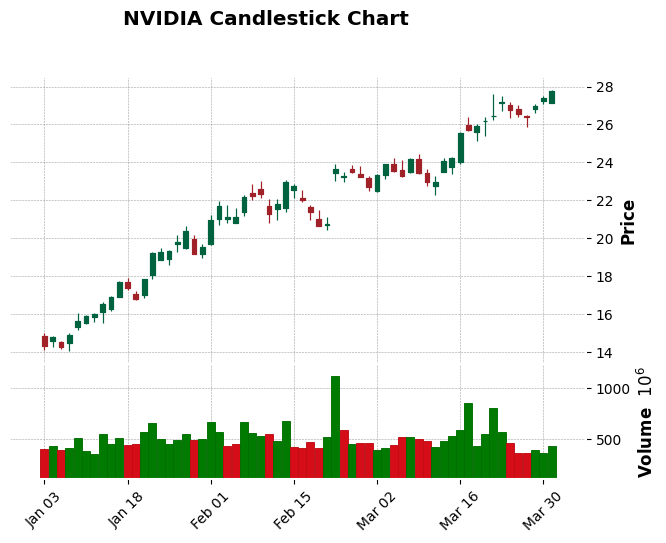

In [9]:

# Asegúrate de que las fechas estén en el índice del DataFrame

# Filtrar el rango de fechas deseado
start_date = '2023-01-01'
end_date = '2023-03-31'
filtered_data = df.loc[start_date:end_date]

# Asegúrate de que el DataFrame filtrado tenga las columnas necesarias para la gráfica de velas
# El DataFrame debe contener las columnas 'Open', 'High', 'Low', 'Close'
# Opcionalmente, también puede contener 'Volume' si deseas mostrar el volumen de operaciones

# Generar la gráfica de velas japonesas
mpf.plot(filtered_data, type='candle', style='charles', title='NVIDIA Candlestick Chart', ylabel='Price', volume=True)

plt.show()

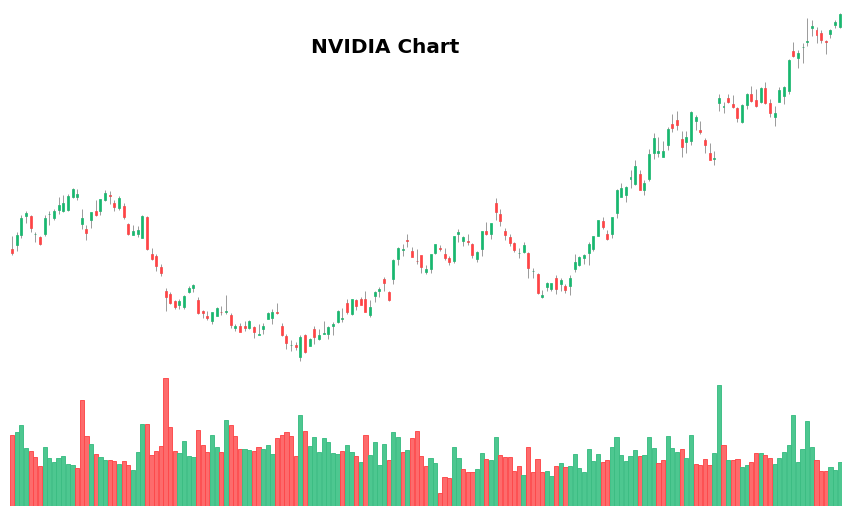

¿Desea guardar la imagen de la gráfica? (si/no): no
Imagen no guardada.


In [10]:
# Filtrar el rango de fechas deseado
start_date = '2022-07-18'
end_date = '2023-03-31'
filtered_data = df.loc[start_date:end_date]

# Asegúrate de que el DataFrame filtrado tenga las columnas necesarias para la gráfica de velas
# El DataFrame debe contener las columnas 'Open', 'High', 'Low', 'Close'
# Opcionalmente, también puede contener 'Volume' si deseas mostrar el volumen de operaciones

# Generar la gráfica de velas japonesas
# Generar la gráfica de velas japonesas
#fig = mpf.plot(filtered_data, type='candle', style='yahoo', title='NVIDIA Chart', ylabel='Price', volume=True, tight_layout=True, figratio=(10,6) ) # Remove axisoff=True
#axlist = fig.axes

fig, axlist = mpf.plot(filtered_data, type='candle', style='yahoo',
                     title='NVIDIA Chart', ylabel='Price', volume=True,
                     tight_layout=True, figratio=(10,6), returnfig=True) # Add returnfig=True

# Turn off axes after figure creation
for ax in axlist:
    ax.set_axis_off()

plt.show()

save_image = input("¿Desea guardar la imagen de la gráfica? (si/no): ").strip().lower()

if save_image == 'si':
    # Guardar la imagen
    output_file = 'nvidia_candlestick_chart.png'
    fig.savefig(output_file)
    print(f"Imagen guardada como {output_file}")
else:
    print("Imagen no guardada.")

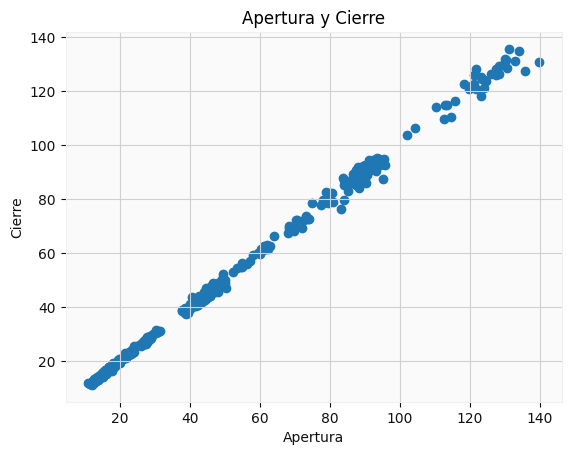

In [11]:
plt.scatter(x = df['Open'], y = df['Close'])
plt.title('Apertura y Cierre')
plt.xlabel('Apertura')
plt.ylabel('Cierre')
plt.show()

In [12]:
def mostrar_imagen(imagen):
    plt.imshow(imagen[0])
    plt.axis('off')
    plt.show()



# 2 Paso. Crear Modelo


In [13]:
datos_entrenamiento = df.sample(frac=0.8, random_state=0)
df_test = df.drop(datos_entrenamiento.index)

In [14]:
datos_entrenamiento

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-22,15.328000,16.058001,15.122000,16.038000,16.024717,472866000
2022-12-02,16.659000,16.933001,16.445000,16.875999,16.866339,371389000
2023-11-09,47.466999,48.230000,46.750000,46.950001,46.939816,540496000
2023-11-20,49.312000,50.548000,49.181000,50.409000,50.398064,414120000
2023-11-21,50.125999,50.516998,49.222000,49.944000,49.933167,565747000
...,...,...,...,...,...,...
2023-08-25,47.012001,47.805000,45.023998,46.018002,46.004227,925341000
2023-06-12,39.200001,39.529999,38.618000,39.481998,39.470181,388701000
2023-02-16,22.132999,22.549999,21.927000,22.002001,21.989405,412026000


Separamos los datos del DataFrame en 80% y 20%.

**80% es para el entrenamiento**

**20% para el test del modelo de aprendizaje automático**


El siguiente paso es determinar la variable que queremos predecir, en este caso el cierre ya que queremos predecir si subirá o bajará al final de la sesión.

In [15]:
etiquetas_entrenamiento = datos_entrenamiento.pop('Close')
etiquetas_test = df_test.pop('Close')

In [16]:
etiquetas_entrenamiento

,Close
Date,
2022-11-22,16.038000
2022-12-02,16.875999
2023-11-09,46.950001
2023-11-20,50.409000
2023-11-21,49.944000
...,...
2023-08-25,46.018002
2023-06-12,39.481998
2023-02-16,22.002001


In [17]:
etiquetas_test

,Close
Date,
2022-07-29,18.163000
2022-08-22,17.034000
2022-08-25,17.913000
2022-08-30,15.468000
2022-08-31,15.094000
...,...
2024-06-20,130.779999
2024-06-21,126.570000
2024-06-24,118.110001


**Como podemos comprobar se ha separado correctamente, hay 502 datos.**

**Se ha separado 402 de entrenamiento y 100 de test.**

In [18]:
datos_entrenamiento

,Open,High,Low,Adj Close,Volume
Date,,,,,
2022-11-22,15.328000,16.058001,15.122000,16.024717,472866000
2022-12-02,16.659000,16.933001,16.445000,16.866339,371389000
2023-11-09,47.466999,48.230000,46.750000,46.939816,540496000
2023-11-20,49.312000,50.548000,49.181000,50.398064,414120000
2023-11-21,50.125999,50.516998,49.222000,49.933167,565747000
...,...,...,...,...,...
2023-08-25,47.012001,47.805000,45.023998,46.004227,925341000
2023-06-12,39.200001,39.529999,38.618000,39.470181,388701000
2023-02-16,22.132999,22.549999,21.927000,21.989405,412026000


**Ya lo tenemos preparado para el entrenamiento, ya no figura la columna 'Close' que es la que vamos a predecir.**

## Creando Modelo de Regresión Lineal


In [19]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(datos_entrenamiento, etiquetas_entrenamiento)

LinearRegression()

In [20]:
predicciones = modelo.predict(df_test)
predicciones

array([ 18.15497419,  17.02713756,  17.90694838,  15.46359904,
        15.09036436,  14.38808689,  14.50598371,  12.93155171,
        12.56508794,  12.1424175 ,  13.1329688 ,  13.26311498,
        13.17854896,  15.75080058,  16.294519  ,  15.67800064,
        15.40902551,  16.51782078,  15.98985919,  17.67654299,
        14.60687538,  14.31914055,  14.26927757,  15.63185796,
        17.37949299,  16.76799905,  19.26657696,  22.76294406,
        20.75472239,  22.96791378,  24.06546371,  27.19248345,
        26.53170549,  27.38341953,  27.45329726,  27.57933684,
        26.49604169,  27.11942985,  27.04233597,  26.95676109,
        27.74877386,  28.67959947,  29.15034268,  31.67817292,
        42.3142519 ,  42.1004255 ,  42.50039915,  47.49049404,
        45.44834542,  44.26632085,  45.41326294,  42.55230059,
        43.34167251,  47.11386728,  48.54341641,  45.57258199,
        44.8701523 ,  45.48520247,  45.58124771,  46.09497813,
        41.77997801,  40.50182251,  41.16242381,  48.33

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(etiquetas_test, predicciones))
print("Error porcentual : %f" % (error*100))

Error porcentual : 0.254407


In [22]:
#df = df.rename(columns={'Adj Close': 'Adj'})

In [27]:
nueva_marca = pd.DataFrame(np.array([['2024-01-12', 120, 123, 118, 117, 481489200]]),
                           columns=['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume'])
nueva_marca

,Date,Open,High,Low,Adj Close,Volume
0,2024-01-12,120,123,118,117,481489200


In [28]:
nueva_marca = nueva_marca.drop('Date', axis=1)
nueva_marca

,Open,High,Low,Adj Close,Volume
0,120,123,118,117,481489200


In [29]:
modelo.predict(nueva_marca)

array([117.00409034])

In [31]:
precio_hoy = pd.DataFrame(np.array([[107, 107, 98, 102, 33727183]]),
                           columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])

In [32]:
precio_hoy

,Open,High,Low,Adj Close,Volume
0,107,107,98,102,33727183


In [33]:
modelo.predict(precio_hoy)

array([102.00193816])